# Evaluate Helios 1, Helios 2, Ulysses, and Voyager Spacecraft Trajectories

In [1]:
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import argrelextrema
from scipy import interpolate
import numpy as np
import scipy
import copy
import pickle
import math
import datetime as dt 

import heliopy.data.spice as spicedata
from heliopy.data import voyager
import heliopy.spice as spice
from heliopy.data import helios
from astropy.coordinates import SkyCoord
import astropy.units as u

# matplotlib fontsize
%matplotlib notebook
%matplotlib inline
fs1=12
plt.rcParams['savefig.facecolor'] = 'white'

# Helios 1 Spacecraft 

# Set large time interval 

Helios-1 and Helios-2 launched on December 10, 1974, and January 15, 1976, respectively. The Helios spacecrafts continued to send data up to 1985.

In [2]:
starttime = dt.datetime(year=1975, month=1, day=15)
endtime = dt.datetime(year=1984, month=1, day=1)
deltatime = dt.timedelta(hours=1)

times = np.arange(starttime, endtime, deltatime)

# Helios 1 Trajectory 

In [3]:
spicedata.get_kernel('helios1')
helios1_traj = spice.Trajectory('Helios 1')
helios1_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
helios1_coords = helios1_traj.coords

# Earth Trajectory 

In [4]:
earth_traj = spice.Trajectory('Earth')
earth_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
earth_coords = earth_traj.coords

# Trajectory Plot


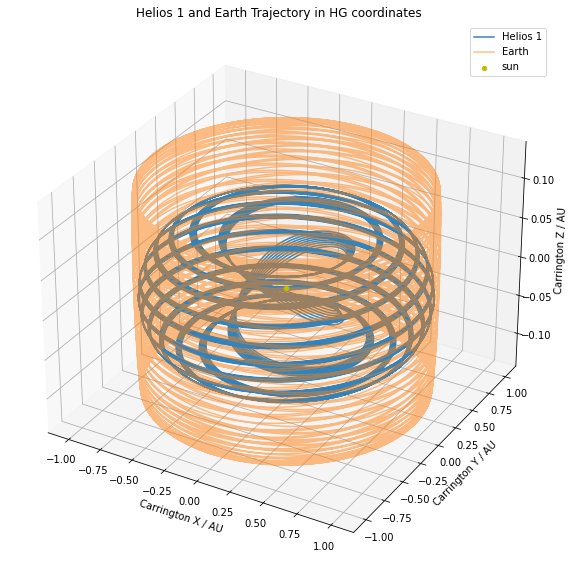

In [5]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')


_ = ax.plot3D(helios1_traj.x.to(u.au), helios1_traj.y.to(u.au), helios1_traj.z.to(u.au), alpha=0.9, label="Helios 1")
_  = ax.plot3D(earth_traj.x.to(u.au), earth_traj.y.to(u.au), earth_traj.z.to(u.au), alpha=0.5, label="Earth")
_ = ax.scatter3D(0, 0, 0, color="y", label="sun")

_ = ax.set_xlabel("Carrington X / AU")
_ = ax.set_ylabel("Carrington Y / AU")
_ = ax.set_zlabel("Carrington Z / AU")
_ = ax.legend()

_ = ax.set_title("Helios 1 and Earth Trajectory in HG coordinates")
plt.savefig('figures/helios1/helios_trajectory_location.png')

# Plot the distance between Helios1 and Earth in HG coordinates

In [6]:
theta_diff = np.abs(helios1_traj.coords.lat - earth_traj.coords.lat)
radial_diff =  np.abs(helios1_traj.coords.radius - earth_traj.coords.radius).to(u.AU)

In [7]:
min_both_index = argrelextrema(theta_diff.value - radial_diff.value, np.less)

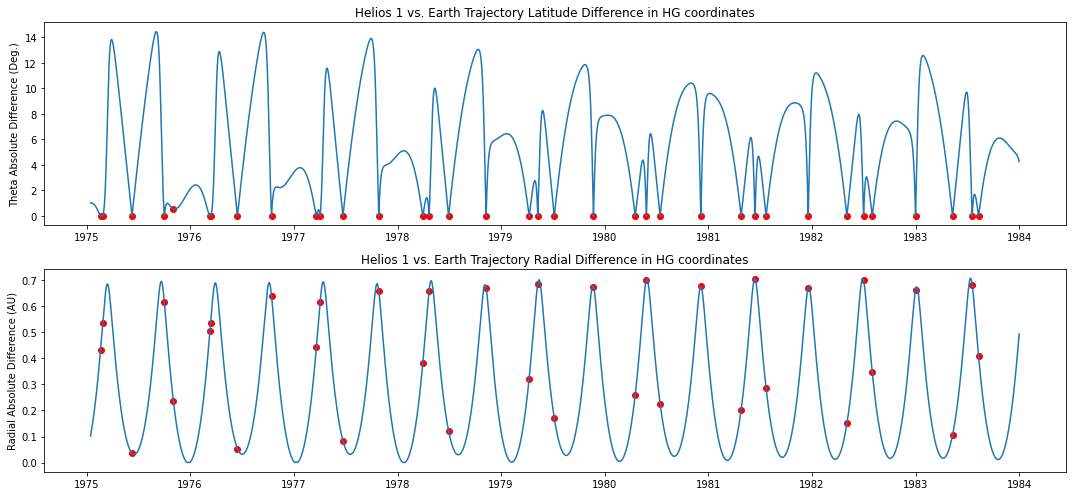

In [8]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize=(15, 7))
_ = ax[0].plot(times, theta_diff)
_ = ax[0].set_ylabel("Theta Absolute Difference (Deg.)")
_ = ax[0].set_title("Helios 1 vs. Earth Trajectory Latitude Difference in HG coordinates")

_ = ax[1].plot(times, radial_diff)
_ = ax[1].set_ylabel("Radial Absolute Difference (AU)")
_ = ax[1].set_title("Helios 1 vs. Earth Trajectory Radial Difference in HG coordinates")


_ = ax[0].scatter(times[min_both_index], theta_diff[min_both_index], c="r")
_ = ax[1].scatter(times[min_both_index], radial_diff[min_both_index], c="r")

plt.tight_layout()
plt.savefig('figures/helios1/helios1_earth_alignment.png')

# Helios 1 local minima

In [9]:
times[min_both_index]

array(['1975-02-19T07:00:00.000000', '1975-02-27T02:00:00.000000',
       '1975-06-10T06:00:00.000000', '1975-10-02T07:00:00.000000',
       '1975-11-02T20:00:00.000000', '1976-03-10T21:00:00.000000',
       '1976-03-13T05:00:00.000000', '1976-06-15T22:00:00.000000',
       '1976-10-14T00:00:00.000000', '1977-03-21T02:00:00.000000',
       '1977-04-03T05:00:00.000000', '1977-06-22T19:00:00.000000',
       '1977-10-27T01:00:00.000000', '1978-03-31T07:00:00.000000',
       '1978-04-22T04:00:00.000000', '1978-06-29T23:00:00.000000',
       '1978-11-09T07:00:00.000000', '1979-04-09T20:00:00.000000',
       '1979-05-10T09:00:00.000000', '1979-07-07T11:00:00.000000',
       '1979-11-22T16:00:00.000000', '1980-04-17T18:00:00.000000',
       '1980-05-27T05:00:00.000000', '1980-07-14T11:00:00.000000',
       '1980-12-05T02:00:00.000000', '1981-04-26T02:00:00.000000',
       '1981-06-13T22:00:00.000000', '1981-07-22T23:00:00.000000',
       '1981-12-18T11:00:00.000000', '1982-05-03T21:00:00.0000

## Tme periods

### CR1624, CR1634, CR1639, CR1647, CR1653, CR1661, CR1666, CR1674, CR1681, CR1710, CR1716, CR1723, CR1730, CR1736

# Helios 2 Spacecraft

Helios-1 and Helios-2 launched on December 10, 1974, and January 15, 1976, respectively. The Helios spacecrafts continued to send data up to 1985.

In [10]:
starttime = dt.datetime(year=1976, month=3, day=1)
endtime = dt.datetime(year=1980, month=1, day=1)
deltatime = dt.timedelta(hours=1)

times = np.arange(starttime, endtime, deltatime)

In [11]:
spicedata.get_kernel('helios2')
helios2_traj = spice.Trajectory('Helios 2')
helios2_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
helios2_coords = helios2_traj.coords

# Earth's Trajectory

In [12]:
earth_traj = spice.Trajectory('Earth')
earth_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
earth_coords = earth_traj.coords

# Trajectory plots

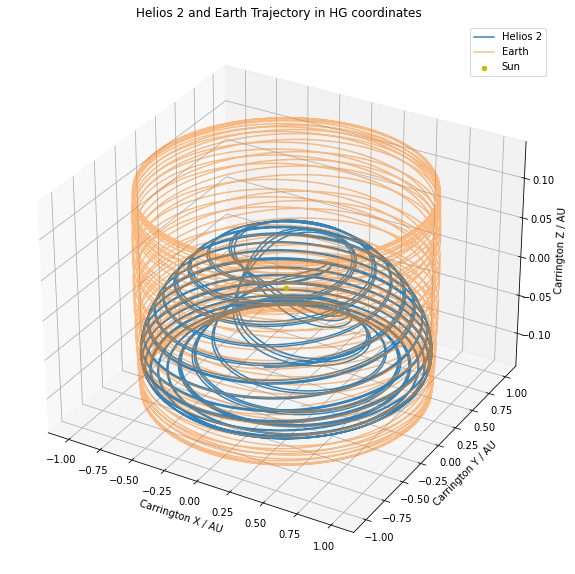

In [13]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')


_ = ax.plot3D(helios2_traj.x.to(u.au), helios2_traj.y.to(u.au), helios2_traj.z.to(u.au), alpha=0.9, label="Helios 2")
_  = ax.plot3D(earth_traj.x.to(u.au), earth_traj.y.to(u.au), earth_traj.z.to(u.au), alpha=0.5, label="Earth")
_ = ax.scatter3D(0, 0, 0, color="y", label="Sun")

_ = ax.set_xlabel("Carrington X / AU")
_ = ax.set_ylabel("Carrington Y / AU")
_ = ax.set_zlabel("Carrington Z / AU")
_ = ax.legend()

_ = ax.set_title("Helios 2 and Earth Trajectory in HG coordinates")
plt.savefig('figures/helios2/helios2_trajectory_location.png')

# Plot the distance between Helios 2 and Earth in HG coordinates

In [14]:
theta_diff2 = np.abs(helios2_traj.coords.lat - earth_traj.coords.lat)
radial_diff2 =  np.abs(helios2_traj.coords.radius - earth_traj.coords.radius).to(u.AU)

In [15]:
min_both_index2 = argrelextrema(theta_diff2.value - radial_diff2.value, np.less)

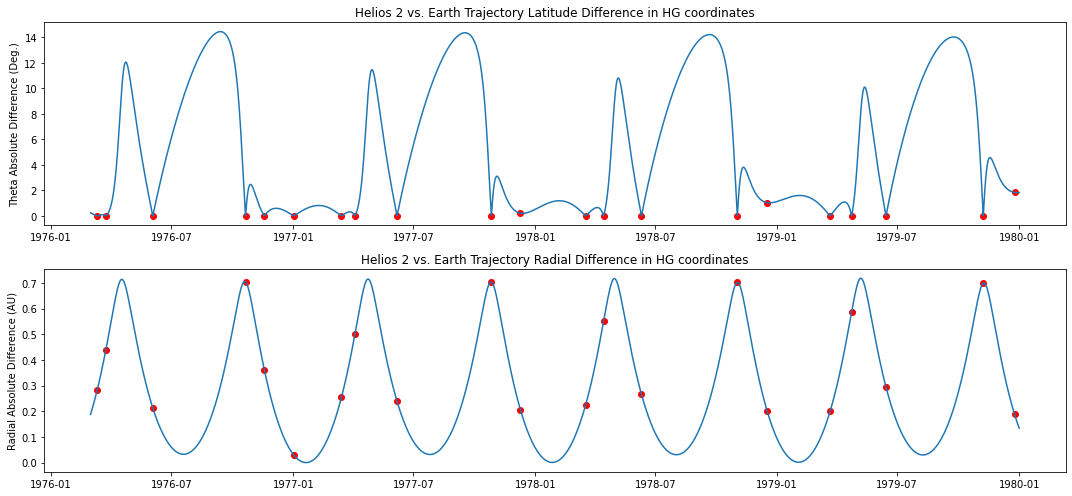

In [16]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize=(15, 7))
_ = ax[0].plot(times, theta_diff2)
_ = ax[0].set_ylabel("Theta Absolute Difference (Deg.)")
_ = ax[0].set_title("Helios 2 vs. Earth Trajectory Latitude Difference in HG coordinates")

_ = ax[1].plot(times, radial_diff2)
_ = ax[1].set_ylabel("Radial Absolute Difference (AU)")
_ = ax[1].set_title("Helios 2 vs. Earth Trajectory Radial Difference in HG coordinates")


_ = ax[0].scatter(times[min_both_index2], theta_diff2[min_both_index2], c="r")
_ = ax[1].scatter(times[min_both_index2], radial_diff2[min_both_index2], c="r")

plt.tight_layout()
plt.savefig('figures/helios2/helios2_earth_alignment.png')

# Helios 2 local minima

In [17]:
times[min_both_index2]

array(['1976-03-11T04:00:00.000000', '1976-03-24T05:00:00.000000',
       '1976-06-02T23:00:00.000000', '1976-10-20T22:00:00.000000',
       '1976-11-18T09:00:00.000000', '1977-01-01T12:00:00.000000',
       '1977-03-14T13:00:00.000000', '1977-04-04T01:00:00.000000',
       '1977-06-06T11:00:00.000000', '1977-10-26T19:00:00.000000',
       '1977-12-09T13:00:00.000000', '1978-03-18T02:00:00.000000',
       '1978-04-13T23:00:00.000000', '1978-06-10T05:00:00.000000',
       '1978-11-01T19:00:00.000000', '1978-12-16T19:00:00.000000',
       '1979-03-21T15:00:00.000000', '1979-04-23T06:00:00.000000',
       '1979-06-14T03:00:00.000000', '1979-11-07T19:00:00.000000',
       '1979-12-25T00:00:00.000000'], dtype='datetime64[us]')

## Time Inerval Results


#### CR1642, CR1647, CR1654, CR1660, CR1667, CR1675, CR1680, CR1688

# Ulysses

Ulysses was launched in 1990 and the last day for mission operations was June 30, 2009.

# Set time interval

In [18]:
starttime = dt.datetime(year=1990, month=11, day=1)
endtime = dt.datetime(year=2009, month=1, day=1)
deltatime = dt.timedelta(hours=1)

times = np.arange(starttime, endtime, deltatime)

# Ulysses Trajectory

In [19]:
spicedata.get_kernel('ulysses')
ulysses_traj = spice.Trajectory('Ulysses')
ulysses_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
ulysses_coords = ulysses_traj.coords

# Earth's Trajectory

In [20]:
earth_traj = spice.Trajectory('Earth')
earth_traj.generate_positions(times=times, observing_body='Sun', frame='IAU_SUN')
earth_coords = earth_traj.coords

# Trajectory Plots

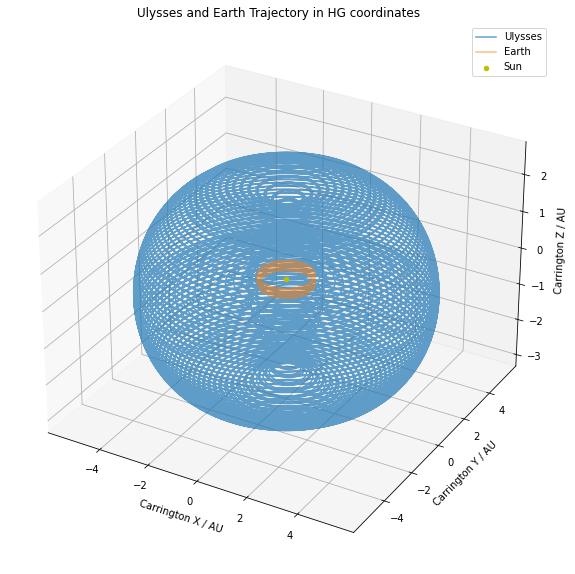

In [21]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')


_ = ax.plot3D(ulysses_traj.x.to(u.au), ulysses_traj.y.to(u.au), ulysses_traj.z.to(u.au), alpha=0.7, label="Ulysses")
_  = ax.plot3D(earth_traj.x.to(u.au), earth_traj.y.to(u.au), earth_traj.z.to(u.au), alpha=0.5, label="Earth")
_ = ax.scatter3D(0, 0, 0, color="y", label="Sun")

_ = ax.set_xlabel("Carrington X / AU")
_ = ax.set_ylabel("Carrington Y / AU")
_ = ax.set_zlabel("Carrington Z / AU")
_ = ax.legend()

_ = ax.set_title("Ulysses and Earth Trajectory in HG coordinates")
plt.savefig('figures/ulysses/ulysses_trajectory_location.png')

# Plot the distance between Ulysses and Earth in HG coordinates

In [22]:
theta_diff3 = np.abs(ulysses_traj.coords.lat - earth_traj.coords.lat)
radial_diff3 =  np.abs(ulysses_traj.coords.radius - earth_traj.coords.radius).to(u.AU)

In [23]:
min_both_index3 = argrelextrema(theta_diff3.value - radial_diff3.value, np.less)

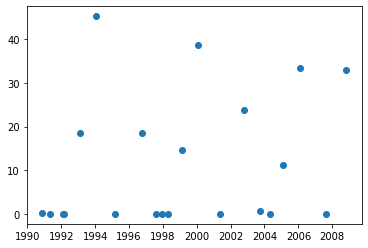

In [24]:
plt.scatter(times[min_both_index3], theta_diff3[min_both_index3])

In [25]:
times[min_both_index3]

array(['1990-11-12T14:00:00.000000', '1991-04-28T13:00:00.000000',
       '1992-02-01T15:00:00.000000', '1992-03-01T12:00:00.000000',
       '1993-02-06T21:00:00.000000', '1994-01-13T03:00:00.000000',
       '1995-02-23T18:00:00.000000', '1996-10-15T15:00:00.000000',
       '1997-08-09T19:00:00.000000', '1997-12-04T09:00:00.000000',
       '1998-04-11T21:00:00.000000', '1999-02-09T05:00:00.000000',
       '2000-01-22T16:00:00.000000', '2001-05-12T02:00:00.000000',
       '2002-10-21T19:00:00.000000', '2003-10-05T13:00:00.000000',
       '2004-05-05T02:00:00.000000', '2005-02-09T19:00:00.000000',
       '2006-01-28T07:00:00.000000', '2007-08-18T18:00:00.000000',
       '2008-11-01T19:00:00.000000'], dtype='datetime64[us]')

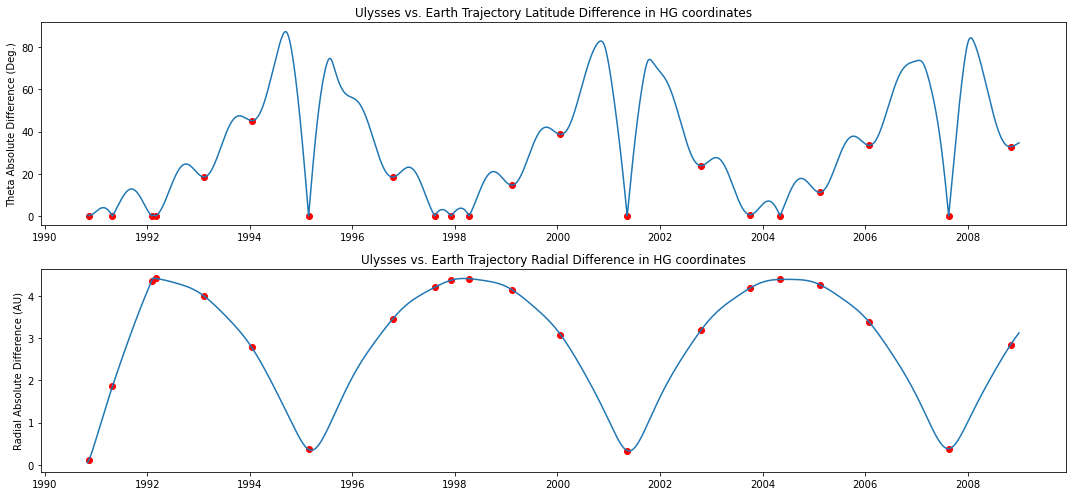

In [26]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize=(15, 7))
_ = ax[0].plot(times, theta_diff3)
_ = ax[0].set_ylabel("Theta Absolute Difference (Deg.)")
_ = ax[0].set_title("Ulysses vs. Earth Trajectory Latitude Difference in HG coordinates")

_ = ax[1].plot(times, radial_diff3)
_ = ax[1].set_ylabel("Radial Absolute Difference (AU)")
_ = ax[1].set_title("Ulysses vs. Earth Trajectory Radial Difference in HG coordinates")


_ = ax[0].scatter(times[min_both_index3], theta_diff3[min_both_index3], c="r")
_ = ax[1].scatter(times[min_both_index3], radial_diff3[min_both_index3], c="r")

plt.tight_layout()
plt.savefig('figures/ulysses/ulysses_earth_alignment.png')

# Time intervals to study

#### CR1852, CR1853, CR1865, CR1915, CR1925, CR1930, CR1934, CR1946
#### CR2008, CR2016, CR2026, CR2039, CR2060.

# Voyager 1 Trajectory

Launched in 1977, sept 5th. 

As of 2021, Voyager 1  and Voyager 2 are at distance of 152.6 and 126.9 AU from Earth as of April 24, 2021, respectively.

## Set Time Interval 

In [27]:
starttime = dt.datetime(year=1977, month=11, day=1)
endtime = dt.datetime(year=1992, month=2, day=1)
deltatime = dt.timedelta(hours=1)

times = np.arange(starttime, endtime, deltatime)

## Voyager 1 Trajectory

In [28]:
voyager1_data = voyager.voyager1_merged(starttime, endtime)
print(voyager1_data.columns)

['heliocentricDistance', 'heliographicLatitude', 'heliographicLongitude', 'ABS_B', 'F', 'BR', 'BT', 'BN', 'V', 'elevAngle', 'azimuthAngle', 'protonDensity', 'protonTemp', 'protonFlux1_LECP', 'protonFlux2_LECP', 'protonFlux3_LECP', 'protonFlux1_CRS', 'protonFlux2_CRS', 'protonFlux3_CRS', 'protonFlux4_CRS', 'protonFlux5_CRS', 'protonFlux6_CRS', 'protonFlux7_CRS', 'protonFlux8_CRS', 'br_uncertainty', 'bt_uncertainty', 'bn_uncertainty', 'protonFlux9_CRS', 'protonFlux10_CRS', 'protonFlux11_CRS', 'protonFlux12_CRS', 'protonFlux13_CRS', 'protonFlux14_CRS', 'protonFlux15_CRS']


In [29]:
voyager1_data.index

DatetimeIndex(['1977-11-01 01:00:00', '1977-11-01 02:00:00',
               '1977-11-01 03:00:00', '1977-11-01 04:00:00',
               '1977-11-01 05:00:00', '1977-11-01 06:00:00',
               '1977-11-01 07:00:00', '1977-11-01 08:00:00',
               '1977-11-01 09:00:00', '1977-11-01 10:00:00',
               ...
               '1992-01-31 14:00:00', '1992-01-31 15:00:00',
               '1992-01-31 16:00:00', '1992-01-31 17:00:00',
               '1992-01-31 18:00:00', '1992-01-31 19:00:00',
               '1992-01-31 20:00:00', '1992-01-31 21:00:00',
               '1992-01-31 22:00:00', '1992-01-31 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=124934, freq=None)

## Earth's Trajectory

In [31]:
earth_traj = spice.Trajectory('Earth')
earth_traj.generate_positions(times=voyager1_data.index, observing_body='Sun', frame='IAU_SUN')
earth_coords = earth_traj.coords

In [32]:
voyager1_data.quantity("heliographicLatitude").to(u.rad)

<Quantity [0.08203047, 0.08203047, 0.08203047, ..., 0.55501467, 0.55501467,
           0.55501467] rad>

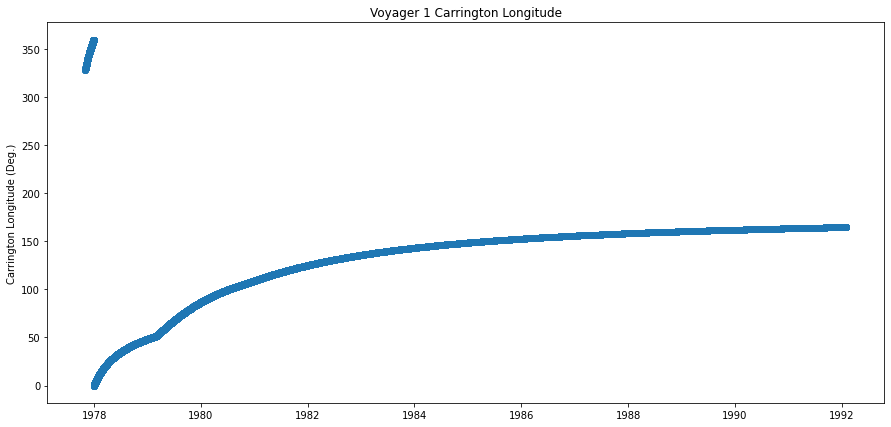

In [33]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(voyager1_data.index, voyager1_data.quantity("heliographicLongitude"))
ax.set_title('Voyager 1 Carrington Longitude')
ax.set_ylabel("Carrington Longitude (Deg.)")
plt.savefig('figures/voyager1/voyager1_longitude.png')

# Plot the distance between Voyager 1 and Earth in HG coordinates

In [34]:
theta_diff4 = np.abs(voyager1_data.quantity("heliographicLatitude") - earth_traj.coords.lat)
radial_diff4 =  np.abs(voyager1_data.quantity("heliocentricDistance") - earth_traj.coords.radius.to(u.AU))

In [35]:
min_both_index4 = argrelextrema(theta_diff4.value, np.less)

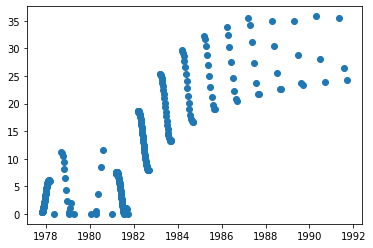

In [38]:
plt.scatter(voyager1_data.index[min_both_index4], theta_diff4[min_both_index4])

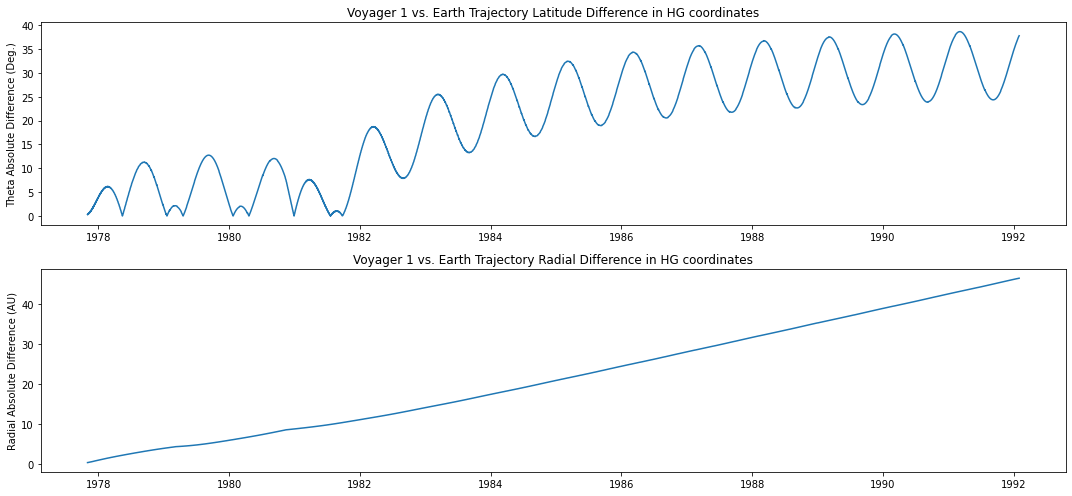

In [39]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize=(15, 7))
_ = ax[0].plot(voyager1_data.index, theta_diff4)
_ = ax[0].set_ylabel("Theta Absolute Difference (Deg.)")
_ = ax[0].set_title("Voyager 1 vs. Earth Trajectory Latitude Difference in HG coordinates")

_ = ax[1].plot(voyager1_data.index, radial_diff4)
_ = ax[1].set_ylabel("Radial Absolute Difference (AU)")
_ = ax[1].set_title("Voyager 1 vs. Earth Trajectory Radial Difference in HG coordinates")


#_ = ax[0].scatter(voyager_data.index[min_both_index4], theta_diff4[min_both_index4], c="r")
#_ = ax[1].scatter(voyager_data.index[min_both_index4], radial_diff4[min_both_index4], c="r")

plt.tight_layout()
plt.savefig('figures/voyager1/voyager1_earth_alignment.png')

# Voyager 2

In [40]:
voyager2_data = voyager.voyager2_merged(starttime, endtime)
print(voyager2_data.columns)

['heliocentricDistance', 'heliographicLatitude', 'heliographicLongitude', 'ABS_B', 'F', 'BR', 'BT', 'BN', 'V', 'elevAngle', 'azimuthAngle', 'protonDensity', 'protonTemp', 'protonFlux1_LECP', 'protonFlux2_LECP', 'protonFlux3_LECP', 'protonFlux1_CRS', 'protonFlux2_CRS', 'protonFlux3_CRS', 'protonFlux4_CRS', 'protonFlux5_CRS', 'protonFlux6_CRS', 'protonFlux7_CRS', 'protonFlux8_CRS', 'protonFlux9_CRS', 'protonFlux10_CRS', 'protonFlux11_CRS', 'br_uncertainty', 'bt_uncertainty', 'bn_uncertainty', 'protonFlux12_CRS', 'protonFlux13_CRS', 'protonFlux14_CRS', 'protonFlux15_CRS', 'protonFlux16_CRS', 'protonFlux17_CRS', 'protonFlux18_CRS']


In [41]:
voyager2_data.index

DatetimeIndex(['1977-11-01 01:00:00', '1977-11-01 02:00:00',
               '1977-11-01 03:00:00', '1977-11-01 04:00:00',
               '1977-11-01 05:00:00', '1977-11-01 06:00:00',
               '1977-11-01 07:00:00', '1977-11-01 08:00:00',
               '1977-11-01 09:00:00', '1977-11-01 10:00:00',
               ...
               '1992-01-31 14:00:00', '1992-01-31 15:00:00',
               '1992-01-31 16:00:00', '1992-01-31 17:00:00',
               '1992-01-31 18:00:00', '1992-01-31 19:00:00',
               '1992-01-31 20:00:00', '1992-01-31 21:00:00',
               '1992-01-31 22:00:00', '1992-01-31 23:00:00'],
              dtype='datetime64[ns]', name='Time', length=124934, freq=None)

## Earth's Trajectory

In [43]:
earth_traj = spice.Trajectory('Earth')
earth_traj.generate_positions(times=voyager2_data.index, observing_body='Sun', frame='IAU_SUN')
earth_coords = earth_traj.coords

In [44]:
earth_coords

<SkyCoord (HeliographicCarrington: obstime=['1977-11-01T01:00:00.000000000' '1977-11-01T02:00:00.000000000'
 '1977-11-01T03:00:00.000000000' ... '1992-01-31T21:00:00.000000000'
 '1992-01-31T22:00:00.000000000' '1992-01-31T23:00:00.000000000'], rsun=695700.0 km, observer=<HeliographicStonyhurst Coordinate (obstime=None, rsun=695700.0 km): (lon, lat, radius) in (deg, deg, m)
    (0., 0., 6.957e+08)>): (lon, lat, radius) in (deg, deg, km)
    [(303.58572451,  4.35439749, 1.48469316e+08),
     (303.0362924 ,  4.3501818 , 1.48467739e+08),
     (302.48686082,  4.34596371, 1.48466162e+08), ...,
     (  8.25537092, -5.97684437, 1.47394462e+08),
     (  7.7067893 , -5.97987964, 1.47395336e+08),
     (  7.15820772, -5.98291162, 1.47396212e+08)]>

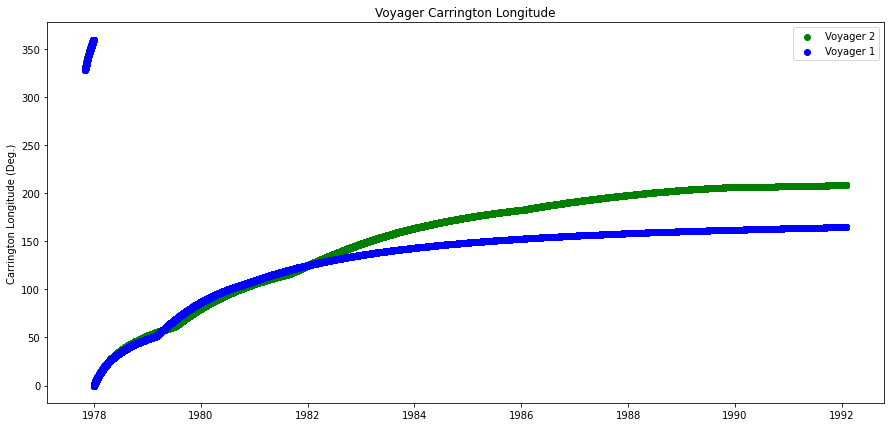

In [47]:
fig, ax = plt.subplots(figsize=(15, 7))
ax.scatter(voyager2_data.index, voyager2_data.quantity("heliographicLongitude"), c="g", label="Voyager 2")
ax.scatter(voyager1_data.index, voyager1_data.quantity("heliographicLongitude"), c="b", label="Voyager 1")
ax.set_title('Voyager Carrington Longitude')
ax.set_ylabel("Carrington Longitude (Deg.)")
plt.legend()
plt.savefig('figures/voyager2/voyager2and1_longitude.png')

In [49]:
theta_diff5 = np.abs(voyager2_data.quantity("heliographicLatitude") - earth_traj.coords.lat)
radial_diff5 =  np.abs(voyager2_data.quantity("heliocentricDistance") - earth_traj.coords.radius.to(u.AU))

In [50]:
min_both_index5 = argrelextrema(theta_diff5.value, np.less)

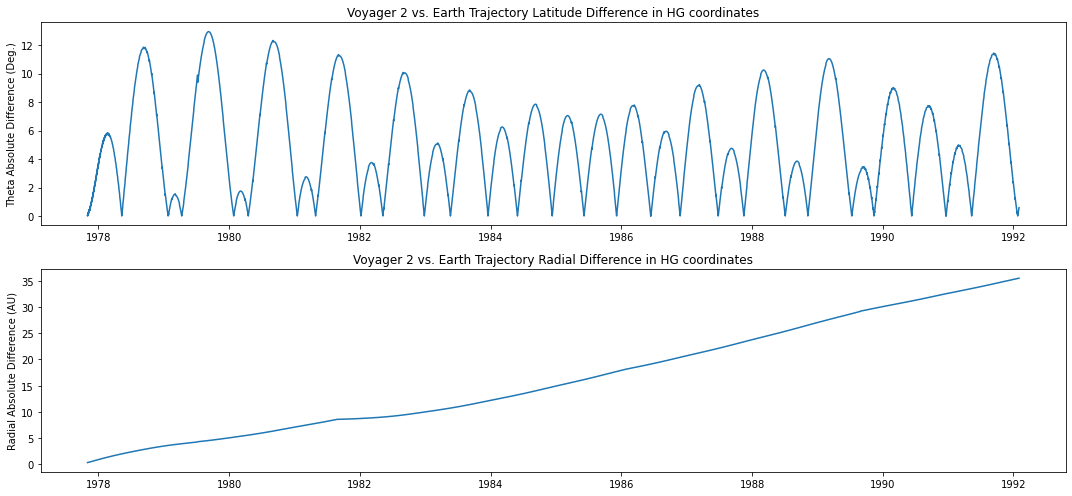

In [51]:
fig, ax = plt.subplots(nrows = 2, ncols= 1, figsize=(15, 7))
_ = ax[0].plot(voyager2_data.index, theta_diff5)
_ = ax[0].set_ylabel("Theta Absolute Difference (Deg.)")
_ = ax[0].set_title("Voyager 2 vs. Earth Trajectory Latitude Difference in HG coordinates")

_ = ax[1].plot(voyager2_data.index, radial_diff5)
_ = ax[1].set_ylabel("Radial Absolute Difference (AU)")
_ = ax[1].set_title("Voyager 2 vs. Earth Trajectory Radial Difference in HG coordinates")


#_ = ax[0].scatter(voyager_data.index[min_both_index5], theta_diff5[min_both_index5], c="r")
#_ = ax[1].scatter(voyager_data.index[min_both_index5], radial_diff5[min_both_index5], c="r")

plt.tight_layout()
plt.savefig('figures/voyager2/voyager2_earth_alignment.png')

In [ ]:
np.min(voyager_data.quantity("heliocentricDistance"))